# Popular places

#### Visualisation of popular places in Prague

In [16]:
import urllib2
import json
import api_key
import pandas as pd
import colorsys
import time

requestURL = 'https://maps.googleapis.com/maps/api/place/textsearch/json?query=places%20of%20intest%20in%20Prague&key=' + api_key.API_KEY

def parse_next(json_data, names, lats, lngs, ratings):
    parsed = 0
    for result in json_data['results']:
        if (('name' in result) and ('rating' in result) and ('geometry' in result) and ('location' in result['geometry'])
            and ('lat' in result['geometry']['location']) and ('lng' in result['geometry']['location'])):
            names.append(result['name'])
            ratings.append(result['rating'])
            lats.append(result['geometry']['location']['lat'])
            lngs.append(result['geometry']['location']['lng'])
            parsed += 1
    return parsed

names = []
lats = []
lngs = []
ratings = []
parsed = 0
to_parse = 200
next_page_token = None

places = pd.DataFrame()

while parsed < to_parse:
    new_address = requestURL
    if next_page_token is not None:
        new_address = requestURL + '&pagetoken=' + str(next_page_token)

    #print(new_address)
    html = urllib2.urlopen(new_address).read().decode('utf-8')
    data = json.loads(html)
    parsed += parse_next(data, names, lats, lngs, ratings)

    if 'next_page_token' not in data:
        print "next page token not found"
        break
    
    next_page_token = data['next_page_token']
    time.sleep(5)
    
    
places['name'] = names
places['lat'] = lats
places['lng'] = lngs
places['rating'] = ratings
colors = [0] * len(names)
for i in range(len(colors)):
    colors[i] = colorsys.hsv_to_rgb(places['rating'][i] / 5.0 / 3.6, 1, 1)
places['color'] = colors    
    
print len(places)
places[:15]

next page token not found
53


,name,lat,lng,rating,color
0,National Memorial to the Heroes of the Heydric...,50.075950,14.416980,4.8,"(0.4, 1, 0.0)"
1,St. Vitus Cathedral,50.090892,14.400511,4.7,"(0.433333333333, 1, 0.0)"
2,Old Town Square,50.087569,14.421187,4.6,"(0.466666666667, 1, 0.0)"
3,Sightseeing Prague Tours Bus Boat & Castle,50.084833,14.421440,4.1,"(0.633333333333, 1, 0.0)"
4,Vyšehrad,50.064416,14.420024,4.6,"(0.466666666667, 1, 0.0)"
5,Municipal House,50.087721,14.427791,4.3,"(0.566666666667, 1, 0.0)"
6,Dancing House,50.075403,14.414179,4.1,"(0.633333333333, 1, 0.0)"
7,Lennon Wall,50.086251,14.406792,4.0,"(0.666666666667, 1, 0.0)"
8,Taste of Prague Food Tour,50.088804,14.433509,5.0,"(0.333333333333, 1, 0.0)"
9,Prague Segway Tours,50.086206,14.405037,4.9,"(0.366666666667, 1, 0.0)"


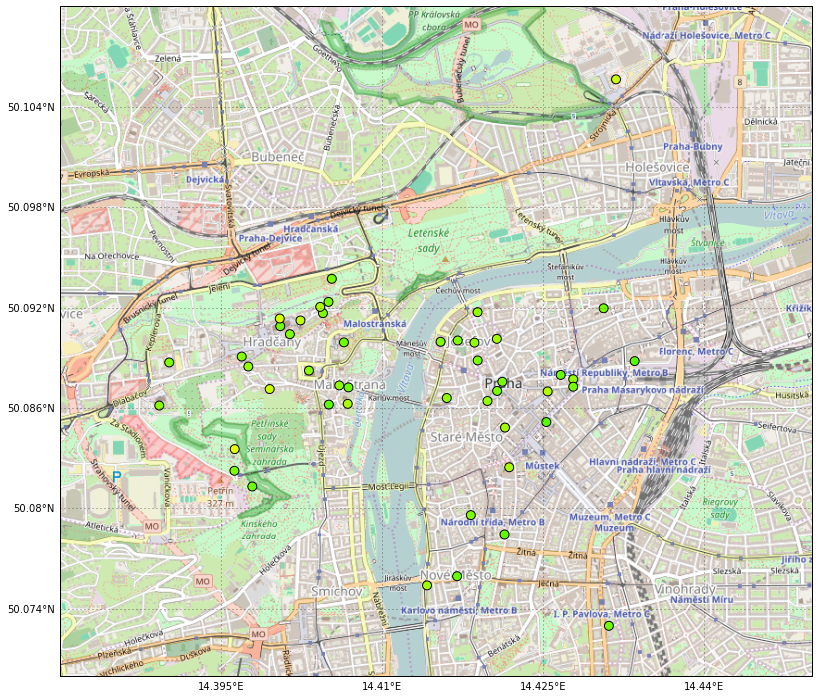

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimg
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import colorsys

MIN_LNG = 14.38
MAX_LNG = 14.45
MIN_LAT = 50.07
MAX_LAT = 50.11

ZOOM_LEVEL = 14
ALPHA = 1.0
SIZE = 80

def make_map(figsize=(16, 12), projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

extent = [MIN_LNG, MAX_LNG, MIN_LAT, MAX_LAT]

request = cimg.OSM()
fig, ax = make_map(figsize=(16,12), projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, ZOOM_LEVEL)
ax.scatter(places['lng'], places['lat'], transform=ccrs.PlateCarree(), alpha=ALPHA, s=SIZE, c=places['color'])
plt.show()